In [3]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
benchmark_results_files = sorted([file for file in os.listdir('data/') if not file.startswith('.')])
benchmark_results_files

['broadcast-ailist-benchmark.csv',
 'partitioned-ailist-benchmark-10.csv',
 'partitioned-ailist-benchmark-100.csv',
 'partitioned-ailist-benchmark-1000.csv',
 'spark-native-bucketing-benchmark-10.csv',
 'spark-native-bucketing-benchmark-100.csv',
 'spark-native-bucketing-benchmark-1000.csv']

In [5]:
benchmark_results_dfs = [pd.read_csv(f"data/{file}") for file in benchmark_results_files]
benchmark_results_df  = pd.concat(benchmark_results_dfs) 
benchmark_results_df.head()

,data_suite,clusters_count,rows_per_cluster,join_name,elapsed_time,result
0,one-to-all,16,100,broadcast-ailist-benchmark,900,success
1,one-to-one,16,100,broadcast-ailist-benchmark,180,success
2,sparse-16,16,100,broadcast-ailist-benchmark,110,success
3,one-to-all,16,250,broadcast-ailist-benchmark,120,success
4,one-to-one,16,250,broadcast-ailist-benchmark,103,success


In [6]:
def plot_dataset(dataset, data_suite):
    plt.figure(figsize=(10, 6))

    for join_name in dataset['join_name'].unique():
        df_to_plot = dataset.query(f'join_name == "{join_name}" and data_suite == "{data_suite}"')
        
        [dataset['join_name'] == join_name]
        plt.plot(df_to_plot['rows_per_cluster'], df_to_plot['elapsed_time'], label=join_name)
    
    # Adding labels and title
    plt.title(f'Benchmark for data suite: {data_suite}')
    plt.xlabel('Data size')
    plt.ylabel('Elapsed time')
    plt.legend()

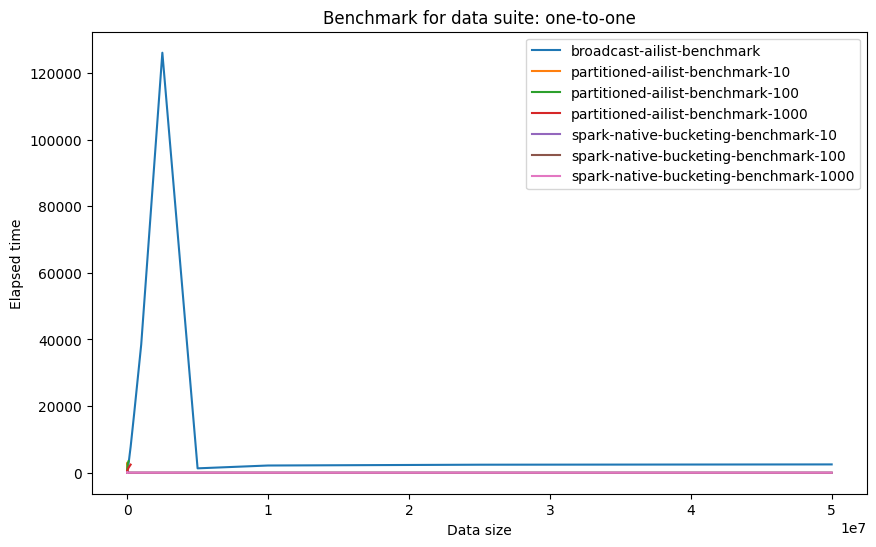

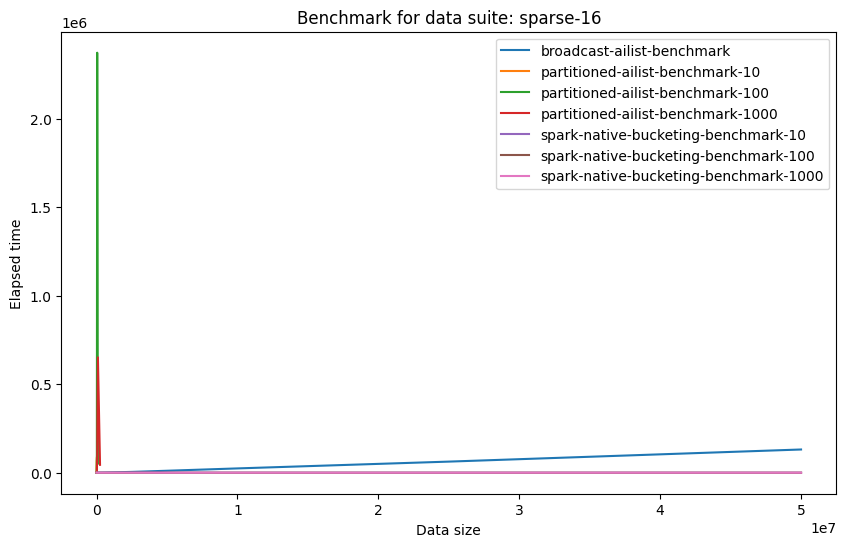

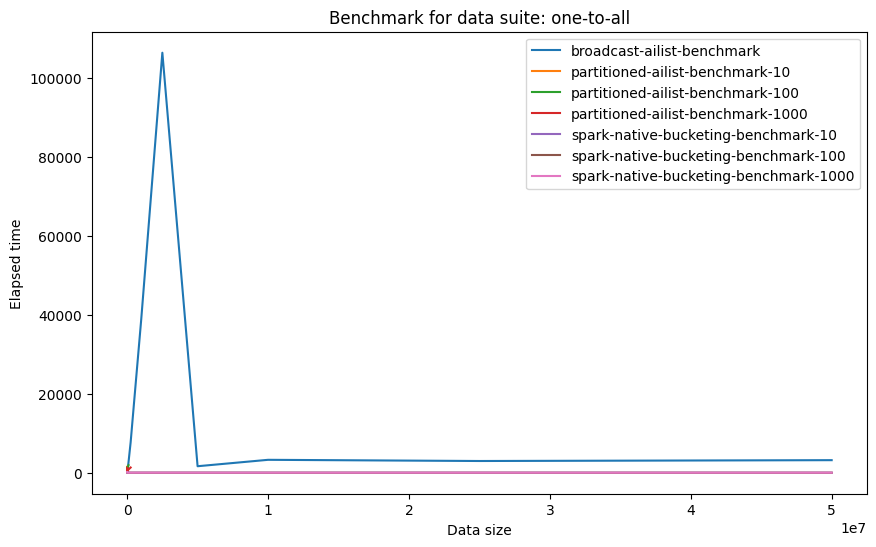

In [7]:
plot_dataset(benchmark_results_df, "one-to-one")
plot_dataset(benchmark_results_df, "sparse-16")
plot_dataset(benchmark_results_df, "one-to-all")